In [3]:
%load_ext autoreload
%autoreload 2

In [51]:
import os

import matplotlib.pyplot as plt
import pandas as pd
from pycbc.distributions import Arbitrary, FromFile

from spiir.distribution import JointDistribution

In [5]:
config_path = "../config/priors.yaml"
priors = JointDistribution.from_yaml(config_path)

In [8]:
mass_priors = JointDistribution(
    distributions=priors.distributions[:2],
    constraints=priors.constraints
)

In [9]:
samples = mass_priors.draw(10000)
samples

,mass_1,mass_2
0,14.977602,4.159199
1,14.893783,4.131259
2,13.533392,3.677797
3,13.024283,3.508094
4,13.178263,3.559421
...,...,...
9995,13.202239,3.567413
9996,14.539474,4.013157
9997,13.874101,3.791366
9998,13.964354,3.821451


In [63]:
# os.remove("masses.hdf")

import h5py

with h5py.File("masses.hdf", mode="a") as f:
    for col in samples.columns:
         f[col] = samples[col].values

# for col in samples.columns:
#     samples[col].values.to_hdf("masses.hdf", key=col)

In [64]:
distribution = FromFile("masses.hdf")

In [65]:
distribution.rvs(100)

array([(12.8508067 , 3.45024421), (14.17435634, 3.89145654),
       (14.29041481, 3.93013043), (18.05815742, 5.18602867),
       (14.54331371, 4.01441389), (15.32427015, 4.27474677),
       (13.61194498, 3.7039671 ), (13.6691965 , 3.72305783),
       (15.19634908, 4.23210526), (15.68910147, 4.39638107),
       (17.62154276, 5.04050063), (14.43748533, 3.97913711),
       (13.53270866, 3.67756782), (13.24857231, 3.58283905),
       (14.93189208, 4.14394723), (12.64287883, 3.38097367),
       (15.74776403, 4.41591046), (15.78984844, 4.4299247 ),
       (14.59617498, 4.03203678), (13.51058136, 3.67019031),
       (13.67894769, 3.72632073), (12.97314399, 3.49106446),
       (13.73868616, 3.74624706), (15.98601122, 4.4953347 ),
       (16.34782563, 4.61594897), (17.718302  , 5.07273477),
       (13.14018117, 3.54672208), (13.97258674, 3.82418809),
       (16.33484528, 4.61159514), (13.41794742, 3.63931989),
       (13.73647166, 3.74546884), (18.99775631, 5.49918209),
       (14.84008411, 4.1

In [70]:
dist = JointDistribution.from_yaml("../config/kde_from_file.yaml")

AttributeError: 'Dataset' object has no attribute 'keys'

In [ ]:
dist.draw(10)

,mass_1
0,14.617199
1,15.786166
2,16.652551
3,13.555634
4,16.399558
5,13.469283
6,14.392259
7,12.699109
8,13.837379
9,14.730163


/tmp/ipykernel_5134/260242868.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  samples.hist(bins=50, ax=ax)


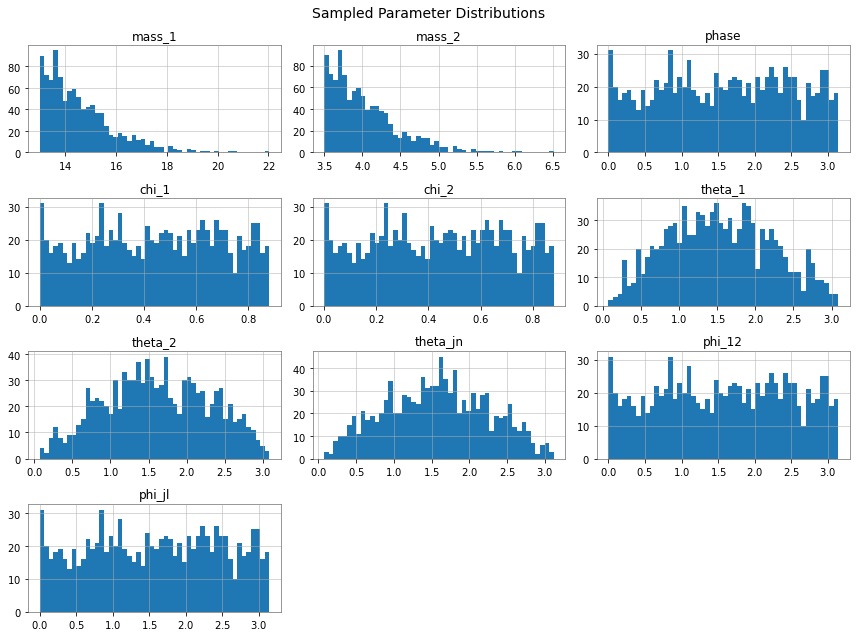

In [19]:
# fig, ax = plt.subplots(figsize=(12,9))
# samples.hist(bins=50, ax=ax)
# fig.suptitle("Sampled Parameter Distributions", fontsize=14)
# fig.tight_layout()
# fig.savefig("../figures/sample_distributions.png", bbox_inches="tight", facecolor="white")
# fig.show()